In [1]:
import os
# Ignore my broken HDF5 install...
os.putenv("HDF5_DISABLE_VERSION_CHECK", '1')

In [2]:
import iris

from utils import get_bc_ppe_data

from GCEm.nn_model import NNModel
from GCEm.utils import get_random_params

import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.6 when it was built against 1.10.5, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


# Read in the parameters and data

In [3]:
# TODO: It would be nice to automate this somehow...
data_path = 'F:\\Local Data\\BC_PPE\\'

In [4]:
ppe_params, ppe_aaod = get_bc_ppe_data(data_path)

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\__init__.py:249: IrisDeprecation: setting the 'Future' property 'netcdf_promote' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\__init__.py:249: IrisDeprecation: setting the 'Future' property 'netcdf_promote' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))


In [5]:
# Ensure the time dimension is last - this is treated as the color 'channel'
ppe_aaod.transpose((0,2,3,1))

In [6]:
n_test = 5

X_test, X_train = ppe_params[:n_test], ppe_params[n_test:]
Y_test, Y_train = ppe_aaod[:n_test], ppe_aaod[n_test:]

In [7]:
Y_train

<iris 'Cube' of Absorption optical thickness - total 550nm / (1) (job: 34; latitude: 96; longitude: 192; time: 12)>

# Setup and run the models

In [8]:
model = NNModel(X_train, Y_train)

In [9]:
model.train()

Epoch 1/100
4/4 [==============================] - 0s 102ms/step - loss: 1.1410 - val_loss: 0.4636
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 1.1386 - val_loss: 0.4639
Epoch 3/100
4/4 [==============================] - 0s 31ms/step - loss: 1.1344 - val_loss: 0.4628
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 0.810 - 0s 25ms/step - loss: 1.1285 - val_loss: 0.4662
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 1.1261 - val_loss: 0.4688
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 1.1081 - val_loss: 0.4745
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0899 - val_loss: 0.4756
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0787 - val_loss: 0.4808
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0484 - val_loss: 0.4932
Epoch 10/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0130 - val_loss: 0

In [10]:
m, v = model.predict(X_test)

In [11]:
# validation_plot(Y_test.data.flatten(), m.data.flatten(), v.data.flatten())

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


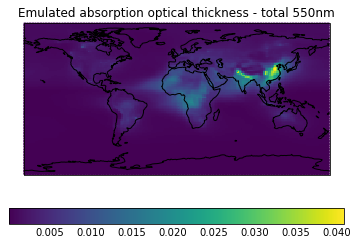

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


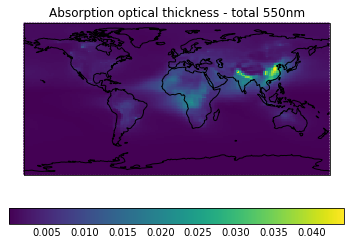

In [12]:
qplt.pcolormesh(m[0].collapsed('time', iris.analysis.MEAN))
plt.gca().coastlines()
plt.show()
qplt.pcolormesh(Y_test[0].collapsed('time', iris.analysis.MEAN))
plt.gca().coastlines()

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'sample'.
  warnings.warn(msg.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'job'.
  warnings.warn(msg.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


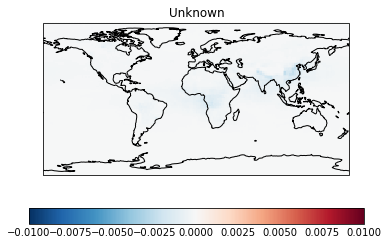

In [13]:
qplt.pcolormesh((m.collapsed(['sample', 'time'], iris.analysis.MEAN)-Y_test.collapsed(['job', 'time'], iris.analysis.MEAN)), cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.gca().coastlines()

In [14]:
m, sd = model.batch_stats(get_random_params(3, int(1e4)), batch_size=100)

100%|##########| 10000/10000 [00:02<00:00, 5188.77sample/s]

In [15]:
m

<iris 'Cube' of Ensemble mean Absorption optical thickness - total 550nm / (1) (latitude: 96; longitude: 192; time: 12)>

In [16]:
m, sd = model.batch_stats(get_random_params(3, int(1e5)), batch_size=1000)

100%|##########| 100000/100000 [00:14<00:00, 7140.84sample/s]